(4032, 3024, 3)

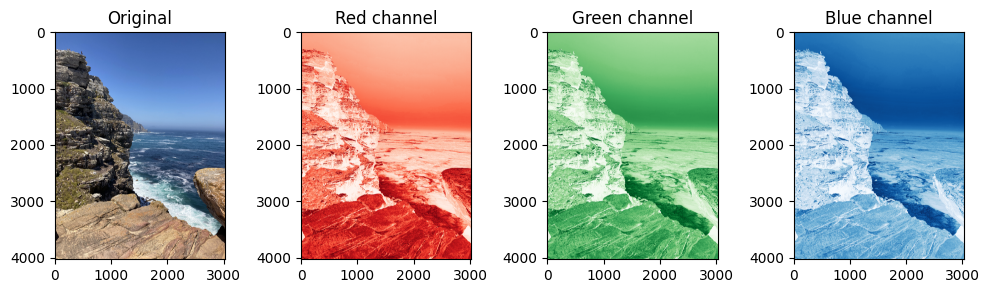

In [1]:
import numpy as np
from scipy.signal import convolve2d

from matplotlib import pyplot as plt
from skimage.io import imread, imsave
from skimage.util import (img_as_float32,
    img_as_ubyte, random_noise)

img = imread('IMG_1975.jpeg')

img = np.rot90(img, 3)

fig, axes = plt.subplots(1, 4, figsize=(10, 40))
axes[0].imshow(img)
axes[0].set_title('Original')
axes[1].imshow(img[:, :, 0], cmap='Reds')
axes[1].set_title('Red channel')
axes[2].imshow(img[:, :, 1], cmap='Greens')
axes[2].set_title('Green channel')
axes[3].imshow(img[:, :, 2], cmap='Blues')
axes[3].set_title('Blue channel')
plt.tight_layout()

type(img)
img.shape


In [2]:
img = img_as_float32(img)
img.dtype

dtype('float32')

Text(0.5, 1.0, 'Original')

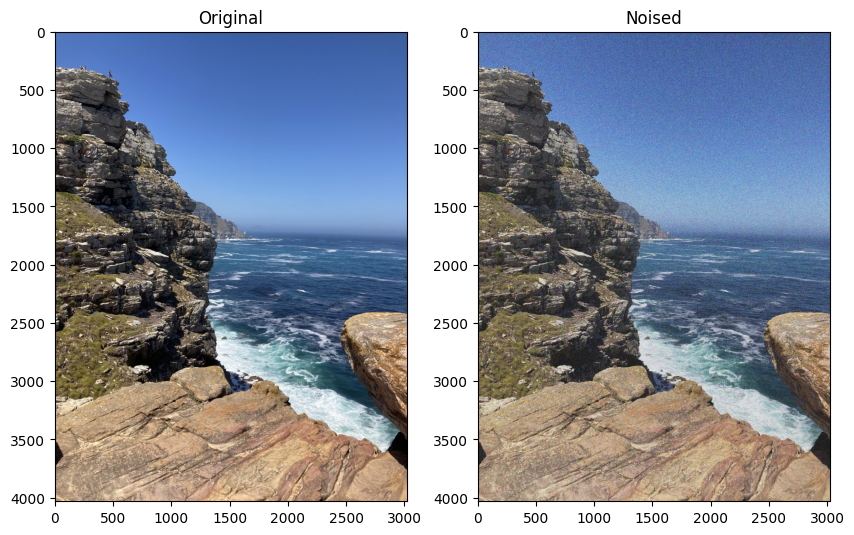

In [3]:
img_noised = random_noise(img, mode='gaussian', var=0.1)

fig, axes = plt.subplots(1, 2, figsize=(10, 40))
axes[1].imshow(img_noised)
axes[1].set_title('Noised')
axes[0].imshow(img)
axes[0].set_title('Original')


In [4]:
kernel_blur = np.ones((5, 5))
kernel_blur /= np.sum(kernel_blur)
kernel_blur

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

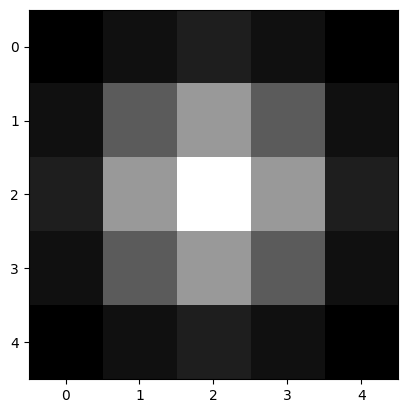

In [5]:
def gaussian_kernel(kernel_size, sigma=0.1, mu=0.0):
    """a function to generate Gaussian 2D kernel"""
    center = kernel_size // 2
    x, y = np.mgrid[
        -center: kernel_size - center,
        -center: kernel_size - center
    ]
    d = np.sqrt(np.square(x) + np.square(y))
    koeff = 1/(2* np.pi*np.square(sigma))
    kernel =koeff*np.exp(-np.square(d-mu)/(2*np.square(sigma)))
    return kernel

kernel_gaussian = gaussian_kernel(5, sigma=1)
kernel_gaussian

plt.imshow(kernel_gaussian, cmap='gray')

In [6]:
def color_convolution(image, kernel):
    """A function to apply a filter to an image"""
    channels = []
    for i in range(3):
        color_channel = image[:, :, i]
        filtered_channel = convolve2d(color_channel, kernel, mode='same')
        filtered_channel = np.clip(filtered_channel, 0, 1)
        channels.append(filtered_channel)
    final_image = np.stack(channels, axis=-1)
    return final_image

Text(0.5, 1.0, 'Blurred')

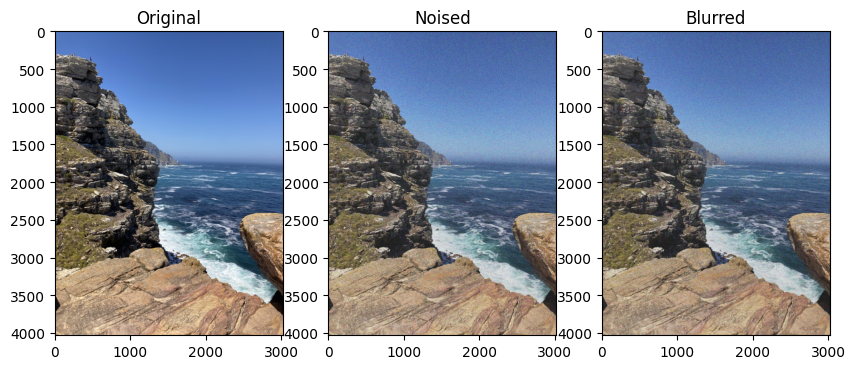

In [7]:

img_blur = color_convolution(img_noised, kernel_gaussian)

fig, axes = plt.subplots(1, 3, figsize=(10, 40))
axes[1].imshow(img_noised)
axes[1].set_title('Noised')
axes[0].imshow(img)
axes[0].set_title('Original')
axes[2].imshow(img_blur)
axes[2].set_title('Blurred')

In [8]:
kernel_sharpen = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 50, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
], dtype=np.float32)

kernel_sharpen /= np.sum(kernel_sharpen)
kernel_sharpen

array([[-0.03846154, -0.03846154, -0.03846154, -0.03846154, -0.03846154],
       [-0.03846154, -0.03846154, -0.03846154, -0.03846154, -0.03846154],
       [-0.03846154, -0.03846154,  1.9230769 , -0.03846154, -0.03846154],
       [-0.03846154, -0.03846154, -0.03846154, -0.03846154, -0.03846154],
       [-0.03846154, -0.03846154, -0.03846154, -0.03846154, -0.03846154]],
      dtype=float32)

Text(0.5, 1.0, 'Restored')

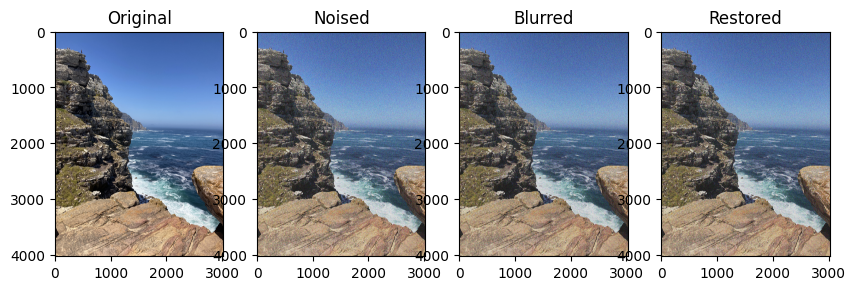

In [9]:
img_restored = color_convolution(img_blur, kernel_sharpen)

fig, axes = plt.subplots(1, 4, figsize=(10, 40))
axes[1].imshow(img_noised)
axes[1].set_title('Noised')
axes[0].imshow(img)
axes[0].set_title('Original')
axes[2].imshow(img_blur)
axes[2].set_title('Blurred')
axes[3].imshow(img_restored)
axes[3].set_title('Restored')

In [ ]:
image_modified = img_as_ubyte(img_restored)
imsave('restored.jpg', image_modified)
imsave('noised.jpg', img_as_ubyte(img_noised))
imsave('blurred.jpg', img_as_ubyte(img_blur))